<a href="https://colab.research.google.com/github/ZainaHweij/csdiagnostic/blob/main/RFC_Model_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning RFC algorithm to diagnose Acute Compartment Syndrome

## Train classification algorithm

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Train model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset training_three.csv
df = pd.read_csv('/content/drive/MyDrive/SEF 2023-2024/TinyML/training_three.csv')

# Split data into features (X) and target (y)
X = df[['fsr_1', 'fsr_2','fsr_3','fsr_4','fsr_5']]
y = df['ground_truth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model to a file
model_filename = '/content/drive/MyDrive/SEF 2023-2024/TinyML/tinyml_model_test.pkl'
joblib.dump(clf, model_filename)
print(f"Model saved to {model_filename}")

Test correct csv data loading if necessary

In [ ]:
print(X_test, y_pred)

## Visualize model

Visualize a decision tree in a Random Forest

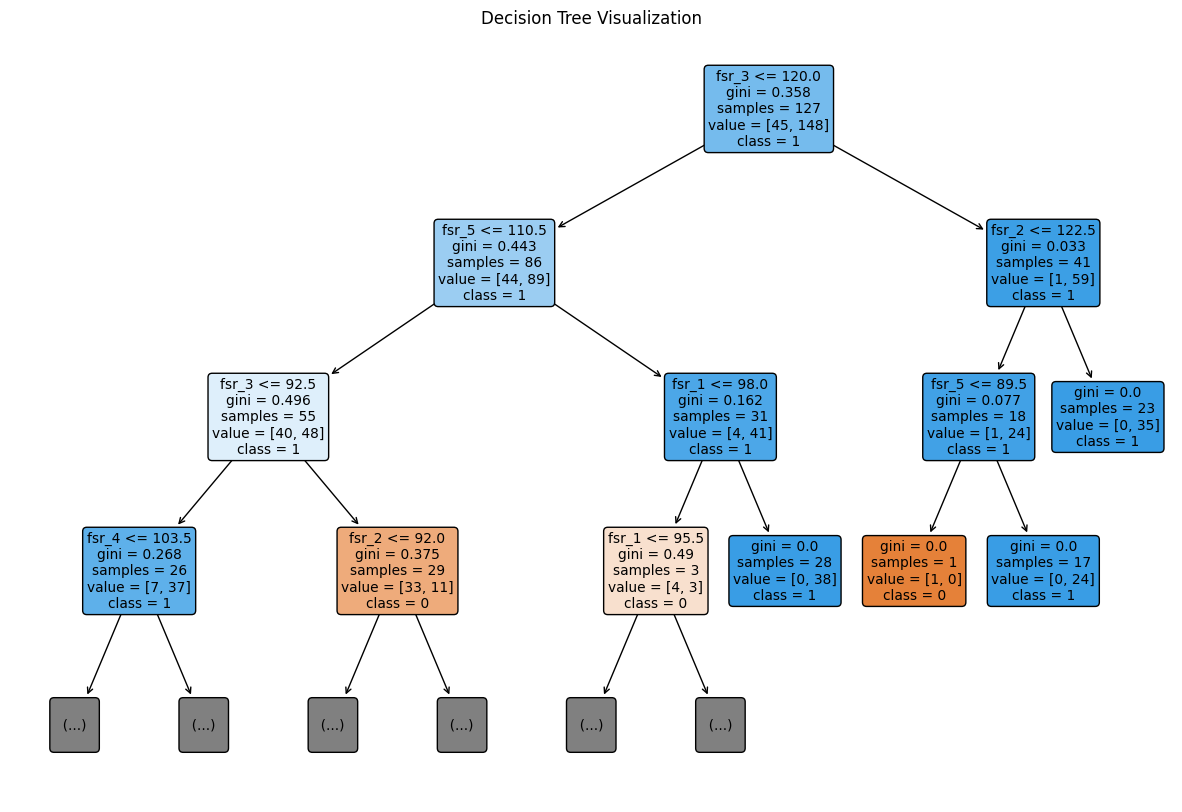

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# You can pick a tree, e.g., the first one (index 0)
tree_to_visualize = clf.estimators_[0]

# Convert class names to strings
class_names_str = [str(class_name) for class_name in clf.classes_]

# Plot the tree
plt.figure(figsize=(15, 10))
plot_tree(tree_to_visualize, filled=True, feature_names=X.columns, class_names=class_names_str, rounded=True, max_depth=3)
plt.title("Decision Tree Visualization")

save_path = '/content/drive/MyDrive/SEF 2023-2024/TinyML/Performance/RFC_model/decision_tree_RFC_abbreviated.png'
plt.savefig(save_path)

plt.show()

Alternative way to visualize decision tree using graphviz

In [36]:
import graphviz
from sklearn.tree import export_graphviz

# Choose one tree from the RandomForestClassifier
tree = clf.estimators_[0]

# Export the decision tree to DOT format
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X.columns.tolist(),
                           class_names=y.unique().astype(str),
                           filled=True, rounded=True, special_characters=True, max_depth=3)

# Draw graph
graph = graphviz.Source(dot_data, format="png")

# Save the image
save_path = '/content/drive/MyDrive/SEF 2023-2024/TinyML/Performance/RFC_model/decision_tree_RFC_abbreviated_2.png'
graph.render(save_path, format='png', cleanup=True)

# Display the graph (optional)
graph.view()

'/content/drive/MyDrive/SEF 2023-2024/TinyML/Performance/RFC_model/decision_tree_RFC_abbreviated_2.png.png'

Visualize feature importance

In [ ]:
feature_importances = clf.feature_importances_
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances')

save_path = '/content/drive/MyDrive/SEF 2023-2024/TinyML/Performance/RFC_model/feature_importance.png'
plt.savefig(save_path)

plt.show()

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

save_path = '/content/drive/MyDrive/SEF 2023-2024/TinyML/Performance/RFC_model/ROC_curve.png'
plt.savefig(save_path)

plt.show()

## Generate metrics

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity (recall), specificity, precision, and F1 score
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Check for division by zero
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Check for division by zero
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # Check for division by zero
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0  # Check for division by zero

print(conf_matrix)
print(f"\nAccuracy: {accuracy}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")

## Visualize metrics

Save raw metric scores accuracy, sensitivity, specificity, precision, F1 score and confusian matrix to text file


In [ ]:
output_filename = '/content/drive/MyDrive/SEF 2023-2024/TinyML/Performance/RFC_model/data.txt'
with open(output_filename, 'w') as file:
    print("Confusion Matrix:", file=file)
    print(conf_matrix, file=file)
    print(f"\nAccuracy: {accuracy}", file=file)
    print(f"Sensitivity (Recall): {sensitivity}", file=file)
    print(f"Specificity: {specificity}", file=file)
    print(f"Precision: {precision}", file=file)
    print(f"F1 Score: {f1_score}", file=file)

print("saved to file")

Confusion Matrix (heat map)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['Actual Negative (0)', 'Actual Positive (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted ACS')
plt.ylabel('True ACS')

save_path = '/content/drive/MyDrive/SEF 2023-2024/TinyML/Performance/RFC_model/CM.png'
plt.savefig(save_path)

plt.show()

Metrics (bar chart)

In [ ]:
metrics_names = ['Accuracy', 'Sensitivity (Recall)', 'Specificity', 'Precision', 'F1 Score']
metrics_values = [accuracy, sensitivity, specificity, precision, f1_score]

plt.figure(figsize=(10, 5)) # Higher = better
plt.bar(metrics_names, metrics_values, color=['#df3c5fff', '#6f9bd1ff', '#6f9bd1ff', '#224193ff', 'plum']) # Can select other colors
plt.title('Model Performance Metrics')
plt.ylabel('Score')

save_path = '/content/drive/MyDrive/SEF 2023-2024/TinyML/Performance/RFC_model/PM2.png'
plt.savefig(save_path)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

#bar graph focuse on only relevant metrics
metrics_names = ['Accuracy','Specificity', 'Precision']
metrics_values = [accuracy, specificity, precision]

plt.figure(figsize=(8, 6)) # Higher = better
plt.bar(metrics_names, metrics_values, color=['#df3c5fff', '#6f9bd1ff', '#224193ff']) # Can select other colors
plt.title('Model Performance Metrics')
plt.ylabel('Score')

save_path = '/content/drive/MyDrive/SEF 2023-2024/TinyML/Performance/RFC_model/PM2.png'
plt.savefig(save_path)

plt.show()